<a href="https://colab.research.google.com/github/GanjiManogna/House-price-prediction-using-BDA/blob/main/bda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Update this with your actual file path in Drive
# excel_path = "C:\Users\GANJI MANOGNA\Downloads\HousePricePrediction.xlsx"
excel_path = r"/content/drive/MyDrive/HousePricePrediction.xlsx" # Corrected path for Google Colab
df_pd = pd.read_excel(excel_path)

# Preview
df_pd.head()
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("HousePricePrediction").getOrCreate()
df_spark = spark.createDataFrame(df_pd)
df_spark.printSchema()
df_spark.show(5)# Drop rows with null values in relevant columns
df_spark_cleaned = df_spark.select(['LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'SalePrice']).dropna()
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

feature_cols = ['LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
output = assembler.transform(df_spark_cleaned)

final_data = output.select('features', 'SalePrice')
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

lr = LinearRegression(labelCol='SalePrice')
lr_model = lr.fit(train_data)

results = lr_model.evaluate(test_data)
print("Root Mean Squared Error (RMSE):", results.rootMeanSquaredError)
print("R² Score:", results.r2)
predictions = lr_model.transform(test_data)
predictions.select("features", "SalePrice", "prediction").show(10)
print("Coefficients:", lr_model.coefficients)
print("Intercept:", lr_model.intercept)
pred_df = predictions.select("prediction", "SalePrice").toPandas()

import matplotlib.pyplot as plt
plt.scatter(pred_df['SalePrice'], pred_df['prediction'])
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Prices")
plt.plot([pred_df['SalePrice'].min(), pred_df['SalePrice'].max()],
         [pred_df['SalePrice'].min(), pred_df['SalePrice'].max()],
         color='red', linestyle='--')
plt.show()

# Calculate residuals
pred_df['Residuals'] = pred_df['SalePrice'] - pred_df['prediction']

# Residuals vs Fitted values plot
plt.figure(figsize=(10, 6))
plt.scatter(pred_df['prediction'], pred_df['Residuals'], alpha=0.6, color='teal')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Sale Price")
plt.grid(True)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Extract the relevant columns from the Pandas DataFrame
heatmap_data = df_pd[['LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'SalePrice']].dropna()

# Compute the correlation matrix
corr_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Group by Overall Condition and compute mean SalePrice
avg_price_by_condition = df_pd.groupby('OverallCond')['SalePrice'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='OverallCond', y='SalePrice', data=avg_price_by_condition, palette='viridis')
plt.title('Average Sale Price by Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Average Sale Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/HousePricePrediction.xlsx'

In [12]:
# 1. Install Java, Spark, and PySpark in Colab (with a working Spark link)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark pyspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

import findspark
findspark.init()

tar: spark-3.4.1-bin-hadoop3.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


Exception: Unable to find py4j in /content/spark-3.4.1-bin-hadoop3/python, your SPARK_HOME may not be configured correctly

In [14]:
!wget -O spark-latest.tgz https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

--2025-07-08 11:20:37--  https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-08 11:20:37 ERROR 404: Not Found.



In [15]:
!wget -O spark-latest.tgz https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

--2025-07-08 11:21:04--  https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388341449 (370M) [application/x-gzip]
Saving to: ‘spark-latest.tgz’

spark-latest.tgz    100%[===================>] 370.35M  3.33MB/s    in 3m 25s  

2025-07-08 11:24:30 (1.81 MB/s) - ‘spark-latest.tgz’ saved [388341449/388341449]



In [16]:
!tar xf spark-latest.tgz

In [17]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q findspark pyspark

In [18]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

import findspark
findspark.init()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pandas DataFrame preview:
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     Vi

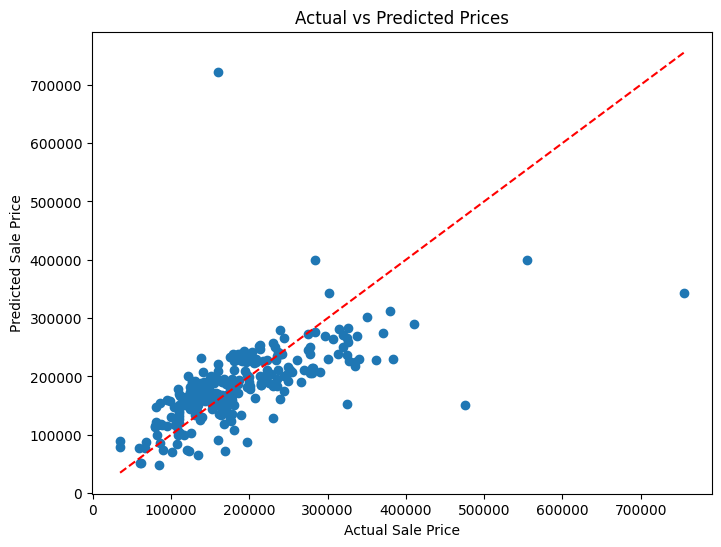

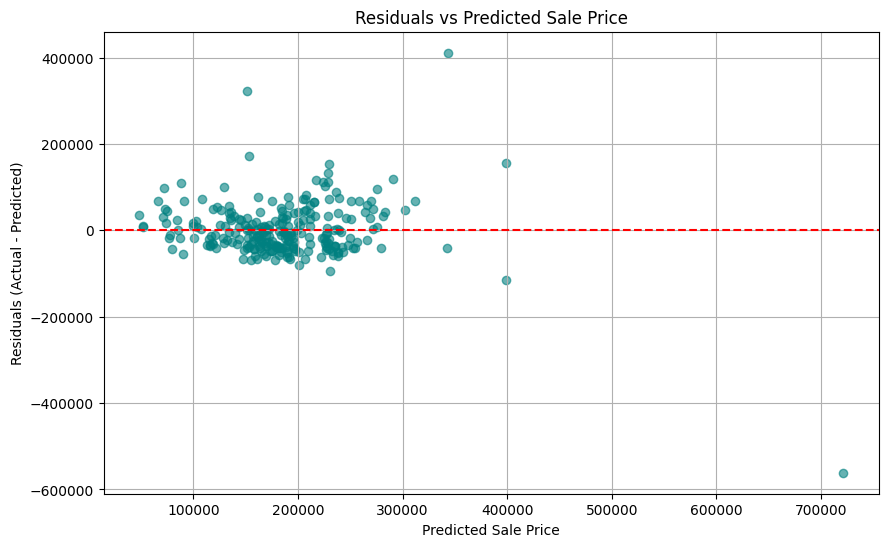

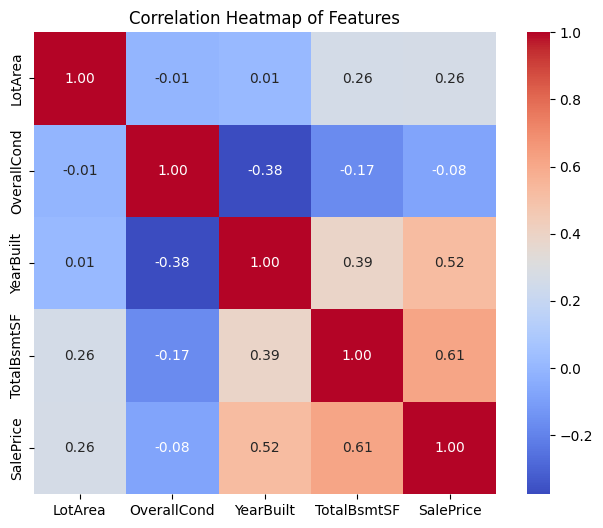

/tmp/ipython-input-19-581813643.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverallCond', y='SalePrice', data=avg_price_by_condition, palette='viridis')


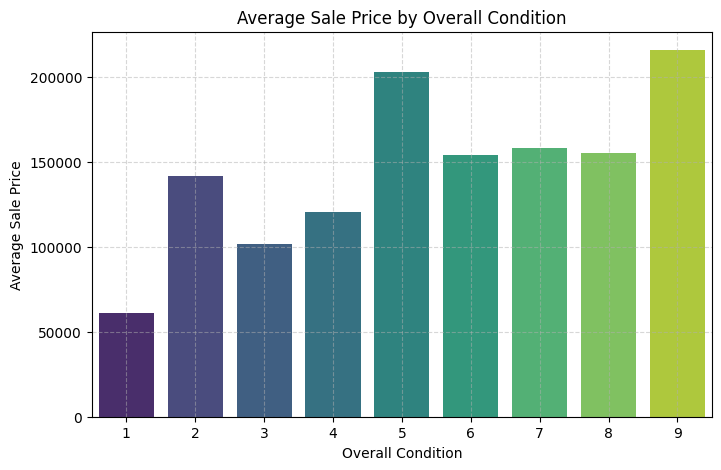

In [19]:

# 2. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 3. Load Data with Pandas
import pandas as pd
excel_path = r"/content/drive/MyDrive/HousePricePrediction.xlsx"  # Update if your path is different
df_pd = pd.read_excel(excel_path)
print("Pandas DataFrame preview:")
print(df_pd.head())

# 4. Create SparkSession and Convert Pandas DataFrame to Spark DataFrame
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("HousePricePrediction").getOrCreate()
df_spark = spark.createDataFrame(df_pd)
print("Spark DataFrame schema:")
df_spark.printSchema()
print("Spark DataFrame preview:")
df_spark.show(5)

# 5. Data Cleaning and Feature Selection
df_spark_cleaned = df_spark.select(['LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'SalePrice']).dropna()

# 6. Feature Engineering
from pyspark.ml.feature import VectorAssembler
feature_cols = ['LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
output = assembler.transform(df_spark_cleaned)
final_data = output.select('features', 'SalePrice')

# 7. Train-Test Split
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

# 8. Model Training
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol='SalePrice')
lr_model = lr.fit(train_data)

# 9. Model Evaluation
results = lr_model.evaluate(test_data)
print("Root Mean Squared Error (RMSE):", results.rootMeanSquaredError)
print("R² Score:", results.r2)
predictions = lr_model.transform(test_data)
print("Sample predictions:")
predictions.select("features", "SalePrice", "prediction").show(10)
print("Coefficients:", lr_model.coefficients)
print("Intercept:", lr_model.intercept)

# 10. Convert Predictions to Pandas for Visualization
pred_df = predictions.select("prediction", "SalePrice").toPandas()

# 11. Visualization: Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(pred_df['SalePrice'], pred_df['prediction'])
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Prices")
plt.plot([pred_df['SalePrice'].min(), pred_df['SalePrice'].max()],
         [pred_df['SalePrice'].min(), pred_df['SalePrice'].max()],
         color='red', linestyle='--')
plt.show()

# 12. Residuals Plot
pred_df['Residuals'] = pred_df['SalePrice'] - pred_df['prediction']
plt.figure(figsize=(10, 6))
plt.scatter(pred_df['prediction'], pred_df['Residuals'], alpha=0.6, color='teal')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Sale Price")
plt.grid(True)
plt.show()

# 13. Correlation Heatmap (Pandas/Seaborn)
import seaborn as sns
heatmap_data = df_pd[['LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'SalePrice']].dropna()
corr_matrix = heatmap_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

# 14. Bar Plot: Average Sale Price by Overall Condition
avg_price_by_condition = df_pd.groupby('OverallCond')['SalePrice'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='OverallCond', y='SalePrice', data=avg_price_by_condition, palette='viridis')
plt.title('Average Sale Price by Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Average Sale Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()